# Compensatory Model - Individuals' choice or choice probabilities by logit rule or elimination by aspects

In [392]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 

## The incumbent set, the candidate product, the preference parameters

In [338]:
df = pd.read_excel('/Users/haitonghuang/Downloads/mugs-preference-parameters-full.xlsx')
df.head()

,Cust,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC,IPr,Iin,ICp,ICl,Icn,IBr
0,1,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1,5,8,32,7,34,14
1,2,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1,6,3,17,10,51,15
2,3,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7,55,5,5,8,16,9
3,4,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5,12,9,3,40,20,16
4,5,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7,56,6,19,9,0,11


### Data Dic

1) Cust = Customers
2) pPr30, pPr10, pPr05 = Price ($\$30$, $\$10$, $\$5$)
3) pIn0.5, pIn1, pIn3 = Time_Insulated (0.5 hour, 1 hour, 3 hours)
4) pCp12, pCp20, pCp32 = Capacity (12on, 20oz, 32oz)
5) pClD, pClF, pClE = Cleanability (Difficult(7 mins), Fair(5 mins), Easy(2 mins))
6) pCnSl, pCnSp, pCnLk = Containment (Slosh resistant, Spill resistant, Leak resistant)
7) pBrA, pBrA, pBrC = Brand (A,B,C)

In [339]:
preference = df.iloc[:,19:]
rating = df.iloc[:,1:19]

In [356]:
preference.head()

,IPr,Iin,ICp,ICl,Icn,IBr
0,5,8,32,7,34,14
1,6,3,17,10,51,15
2,55,5,5,8,16,9
3,12,9,3,40,20,16
4,56,6,19,9,0,11


In [357]:
rating.head()

,pPr30,pPr10,pPr05,pIn0.5,pIn1,pIn3,pCp12,pCp20,pCp32,pClD,pClF,pClE,pCnSl,pCnSp,pCnLk,pBrA,pBrB,pBrC
0,1,3,7,1,3,7,1,7,6,1,2,7,1,5,7,7,5,1
1,1,6,7,1,4,7,1,7,6,1,6,7,1,7,7,7,5,1
2,1,6,7,1,4,7,7,4,1,1,3,7,1,5,7,1,3,7
3,1,6,7,1,4,7,7,1,3,1,5,7,1,5,7,7,1,5
4,1,4,7,1,4,7,1,7,2,1,3,7,1,7,7,3,1,7


In [358]:
price = rating.iloc[:,0:3]
Time_Insulated = rating.iloc[:,3:6]
capacity = rating.iloc[:,6:9]
cleanability = rating.iloc[:,9:12]
containment = rating.iloc[:,12:15]
brand = rating.iloc[:,15:18]

In [359]:
customer = preference.iloc[0]

In [361]:
#preference for customer 1
customer

 IPr     5
Iin      8
 ICp    32
 ICl     7
Icn     34
 IBr    14
Name: 0, dtype: int64

**Incumbents**

1) $30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand A

2) $10, 1 hrs, 20 oz, Clean Fair, Spill Resistant, Brand B

**Our proposed candidate**

3) $ 30, 1 hrs, 20 oz, Clean Easy, Leak Resistant, Brand C

In [365]:
### For customer 1

utility_A = customer[0] * price.iloc[0][0] + customer[1] *  Time_Insulated.iloc[0][2]  + customer[2] * capacity.iloc[0][1] \
            + customer[3] * cleanability.iloc[0][2] + customer[4] * containment.iloc[0][2] + customer[5] * brand.iloc[0][0]

utility_B = customer[0] * price.iloc[0][1] + customer[1] * Time_Insulated.iloc[0][1] + customer[2] * capacity.iloc[0][1] \
            + customer[3] * cleanability.iloc[0][1] + customer[4] * containment.iloc[0][1] + customer[5] * brand.iloc[0][1]

utility_C = customer[0] * price.iloc[0][0] + customer[1] * Time_Insulated.iloc[0][1] + customer[2] * capacity.iloc[0][1] \
            + customer[3] * cleanability.iloc[0][2] + customer[4] * containment.iloc[0][2] + customer[5] * brand.iloc[0][2]

utility_A,utility_B,utility_C

(670, 517, 554)

## $c = \frac{100}{12  \times \text{Range of Utilities over the product space} }$

**From the past studies Range of Utilities over the product space = 600**

In [372]:
### prob_purchase for customer 1

c = round(100 / (12 * 600),4)

prob_purchase_our_product = np.exp(c * utility_C) / (np.exp(c * utility_C) + np.exp(c * utility_A) + np.exp(c * utility_B))

prob_purchase_our_product

0.15122298445051569

In [373]:
customer_df = preference

In [374]:
prob_of_purchase = []

for i in range(len(customer_df)):
    
    utility_A = customer_df.iloc[i][0] * price.iloc[i][0] + customer_df.iloc[i][1] *  Time_Insulated.iloc[i][2]  + customer_df.iloc[i][2] * capacity.iloc[i][1] \
            + customer_df.iloc[i][3] * cleanability.iloc[i][2] + customer_df.iloc[i][4] * containment.iloc[0][2] + customer_df.iloc[i][5] * brand.iloc[i][0]
    
    utility_B = customer_df.iloc[i][0] * price.iloc[i][1] + customer_df.iloc[i][1] * Time_Insulated.iloc[i][1] + customer_df.iloc[i][2] * capacity.iloc[i][1] \
            + customer_df.iloc[i][3] * cleanability.iloc[i][1] + customer_df.iloc[i][4] * containment.iloc[i][1] + customer_df.iloc[i][5] * brand.iloc[i][1]
    
    utility_C = customer_df.iloc[i][0] * price.iloc[i][0] + customer_df.iloc[i][1] * Time_Insulated.iloc[i][1] + customer_df.iloc[i][2] * capacity.iloc[i][1] \
            + customer_df.iloc[i][3] * cleanability.iloc[i][2] + customer_df.iloc[i][4] * containment.iloc[i][2] + customer_df.iloc[i][5] * brand.iloc[i][2]
    
    c = 0.0139

    prob_purchase_our_product = np.exp(c * utility_C) / (np.exp(c * utility_C) + np.exp(c * utility_A) + np.exp(c * utility_B))

    prob_of_purchase.append(prob_purchase_our_product)
    

    
mrk_share = sum(prob_of_purchase) / len(prob_of_purchase)

mrk_share

0.19452610767391654

1) Time Insulated: 0.5 hrs costs $0.5$, 1 hrs costs $1$, 3 hrs costs $3$

2) Capacity: 12 oz costs $1.00$, 20 oz costs $2.6$,  32 oz costs $2.8$

3) Cleanability: Difficult (7 min) costs $1$, Fair (5 min) costs $2.2$, Easy (2 min) costs $3.0$

4) Containment: Slosh resistant costs $0.5$, Spill resistant costs $0.8$, Leak resistant costs $1$

In [351]:
cost = 1 + 2.6 + 3 + 1

profit = mrk_share * (30 - cost)
profit

4.35738481189573

1) Expected Share = 0.195
2) Cost = 1 + 2.6 + 3 + 1 = 7.6 dollars 
3) Margin = Price - Cost = 30 - 7.6 = 22.4
4) Expected Profit Per Person = 4.357 dollars

In [380]:
df = df.rename(columns={col: col.strip() for col in df.columns})


In [381]:
price_combo = df.columns[1:4]
Time_Insulated_combo = df.columns[4:7]
capacity_combo = df.columns[7:10]
cleanability_combo = df.columns[10:13]
containment_combo = df.columns[13:16]

In [382]:
import itertools

combinations =  list(itertools.product(price_combo,Time_Insulated_combo,capacity_combo,cleanability_combo,containment_combo))

combinations

[('pPr30', 'pIn0.5', 'pCp12', 'pClD', 'pCnSl'),
 ('pPr30', 'pIn0.5', 'pCp12', 'pClD', 'pCnSp'),
 ('pPr30', 'pIn0.5', 'pCp12', 'pClD', 'pCnLk'),
 ('pPr30', 'pIn0.5', 'pCp12', 'pClF', 'pCnSl'),
 ('pPr30', 'pIn0.5', 'pCp12', 'pClF', 'pCnSp'),
 ('pPr30', 'pIn0.5', 'pCp12', 'pClF', 'pCnLk'),
 ('pPr30', 'pIn0.5', 'pCp12', 'pClE', 'pCnSl'),
 ('pPr30', 'pIn0.5', 'pCp12', 'pClE', 'pCnSp'),
 ('pPr30', 'pIn0.5', 'pCp12', 'pClE', 'pCnLk'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClD', 'pCnSl'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClD', 'pCnSp'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClD', 'pCnLk'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClF', 'pCnSl'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClF', 'pCnSp'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClF', 'pCnLk'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClE', 'pCnSl'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClE', 'pCnSp'),
 ('pPr30', 'pIn0.5', 'pCp20', 'pClE', 'pCnLk'),
 ('pPr30', 'pIn0.5', 'pCp32', 'pClD', 'pCnSl'),
 ('pPr30', 'pIn0.5', 'pCp32', 'pClD', 'pCnSp'),
 ('pPr30', 'pIn0.5', 'pCp32', 'pClD', 'p

In [383]:
len(combinations)

243

Incumbents

1: $30, 3 hrs, 20 oz, Clean Easy, Leak Resistant, Brand A

2: $10, 1 hrs, 20 oz, Clean Fair, Spill Resistant, Brand B

Our proposed candidate

3: $ 30, 1 hrs, 20 oz, Clean Easy, Leak Resistant, Brand C

-------------------------------------------------------------
Cost 

Time Insulated: 0.5 hrs costs $0.5$, 1 hrs costs $1$, 3 hrs costs $3$

Capacity: 12 oz costs $1.00$, 20 oz costs $2.6$,  32 oz costs $2.8$

Cleanability: Difficult (7 min) costs $1$, Fair (5 min) costs $2.2$, Easy (2 min) costs $3.0$

Containment: Slosh resistant costs $0.5$, Spill resistant costs $0.8$, Leak resistant costs $1$

In [384]:
cost_dic = {'pIn0.5': 0.5,
            'pIn1': 1,
            'pIn3': 3, 
            'pCp12': 1,
            'pCp20': 2.6,
            'pCp32': 2.8,
            'pClE': 3,
            'pClF': 2.2,
            'pClD': 1,
            'pCnSl': 0.5, 
            'pCnSp': 0.8,
            'pCnLk': 1}

price_dic = {'pPr30': 30,
            'pPr10': 10,
            'pPr05': 5}

In [385]:
mrk_share = []
cost = []
profit = []
price = []

for j in combinations:
    prob_s = []
    for i in range(len(df)):
        
        #importance score for one client
        
        price_importance = df.iloc[i]['IPr']
        Time_importance = df.iloc[i]['Iin']
        capacity_importance = df.iloc[i]['ICp']
        cleanability_importance = df.iloc[i]['ICl']
        containment_importance = df.iloc[i]['Icn']
        brand_importance = df.iloc[i]['IBr']
        
        #utility for product brand 1
        
        rating_price_1 = df.iloc[i]['pPr30']
        time_rating_1 = df.iloc[i]['pIn3']
        capacity_rating_1 = df.iloc[i]['pCp20']
        cleanability_rating_1 = df.iloc[i]['pClE']
        containment_rating_1 = df.iloc[i]['pCnLk']
        brand_rating_1 = df.iloc[i]['pBrA']
        
        u1 = rating_price_1 * price_importance + time_rating_1 * Time_importance + capacity_rating_1 * capacity_importance + \
             cleanability_rating_1 * cleanability_importance + containment_rating_1 * containment_importance + brand_rating_1 * brand_importance
        
        #utility for product brand 2
        
        rating_price_2 = df.iloc[i]['pPr10']
        time_rating_2 = df.iloc[i]['pIn1']
        capacity_rating_2 = df.iloc[i]['pCp20']
        cleanability_rating_2 = df.iloc[i]['pClF']        
        containment_rating_2 = df.iloc[i]['pCnSp'] 
        brand_rating_2 = df.iloc[i]['pBrB']
        
        u2 = rating_price_2 * price_importance + time_rating_2 * Time_importance + capacity_rating_2 * capacity_importance + \
             cleanability_rating_2 * cleanability_importance + containment_rating_2 * containment_importance + brand_rating_2 * brand_importance
        
        
        #utility for product brand 3
        
        rating_price_3 = df.loc[i,j[0]]
        time_rating_3 = df.loc[i,j[1]] 
        capacity_rating_3 = df.loc[i,j[2]]
        cleanability_rating_3 = df.loc[i,j[3]]  
        containment_rating_3 = df.loc[i,j[4]]
        brand_rating_3 = df.loc[i,'pBrC']  
        
        u3 = rating_price_3 * price_importance + time_rating_3 * Time_importance + capacity_rating_3 * capacity_importance + \
             cleanability_rating_3 * cleanability_importance + containment_rating_3 * containment_importance + brand_rating_3 * brand_importance
        
        c = 0.0139        
        
        prob_s.append(np.exp(c * u3) / (np.exp(c * u3) + np.exp(c * u2) + np.exp(c * u1)))
        
    # store market share per customer
    mrk_share.append(np.mean(prob_s))

    # store cost per customer
    cost.append(cost_dic[j[1]] + cost_dic[j[2]] + cost_dic[j[3]] + cost_dic[j[4]])
    
    # store price per customer
    price.append(price_dic[j[0]])
    


In [386]:
len(mrk_share),len(cost),len(price)

(243, 243, 243)

In [417]:
result = pd.DataFrame(combinations, columns = ['Price','Time_Insulate','Capacity','Cleanability','Containment'])
stats = pd.DataFrame([mrk_share,cost,price]).T.rename({0:'Market_share',1:'Cost',2:'Price_number'},axis =1)
result = pd.concat([result,stats],axis = 1)
result['Margin'] = result['Price_number'] - result['Cost']
result['Expected_Profit_Per_Person'] = result['Market_share'] * (result['Price_number'] - result['Cost'])

result

,Price,Time_Insulate,Capacity,Cleanability,Containment,Market_share,Cost,Price_number,Margin,Expected_Profit_Per_Person
0,pPr30,pIn0.5,pCp12,pClD,pCnSl,0.016530,3.0,30.0,27.0,0.446321
1,pPr30,pIn0.5,pCp12,pClD,pCnSp,0.025234,3.3,30.0,26.7,0.673761
2,pPr30,pIn0.5,pCp12,pClD,pCnLk,0.042167,3.5,30.0,26.5,1.117416
3,pPr30,pIn0.5,pCp12,pClF,pCnSl,0.033560,4.2,30.0,25.8,0.865858
4,pPr30,pIn0.5,pCp12,pClF,pCnSp,0.051275,4.5,30.0,25.5,1.307513
...,...,...,...,...,...,...,...,...,...,...
238,pPr05,pIn3,pCp32,pClF,pCnSp,0.455497,8.8,5.0,-3.8,-1.730890
239,pPr05,pIn3,pCp32,pClF,pCnLk,0.555399,9.0,5.0,-4.0,-2.221595
240,pPr05,pIn3,pCp32,pClE,pCnSl,0.441466,9.3,5.0,-4.3,-1.898304
241,pPr05,pIn3,pCp32,pClE,pCnSp,0.529777,9.6,5.0,-4.6,-2.436975


In [418]:
result.loc[result['Expected_Profit_Per_Person'].idxmax()]

Price                            pPr30
Time_Insulate                     pIn3
Capacity                         pCp20
Cleanability                      pClE
Containment                      pCnLk
Market_share                   0.25884
Cost                               9.6
Price_number                      30.0
Margin                            20.4
Expected_Profit_Per_Person    5.280343
Name: 71, dtype: object

In [419]:
result['Expected_Profit_Per_Person'].max()

5.280342623656942

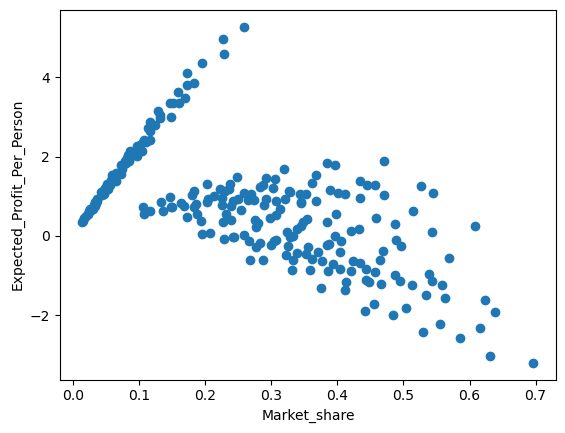

In [421]:
fig,ax = plt.subplots()
ax.scatter(result['Market_share'], result['Expected_Profit_Per_Person'])
ax.set_xlabel('Market_share')
ax.set_ylabel('Expected_Profit_Per_Person')
plt.show()

In [422]:
result.loc[result['Market_share'].idxmax()]

Price                            pPr05
Time_Insulate                     pIn3
Capacity                         pCp20
Cleanability                      pClE
Containment                      pCnLk
Market_share                  0.696713
Cost                               9.6
Price_number                       5.0
Margin                            -4.6
Expected_Profit_Per_Person   -3.204878
Name: 233, dtype: object

**If the primary goal of the company is to achieve market domination, launching the product that has the highest market share could be more advantageous than launching the product with the highest EPPP. This approach could aid in establishing the brand as a market leader, realizing economies of scale. From the scatterplot, it is apparent that EPPP and Share have a linear relationship in the early part of the curve, but beyond a certain point, the correlation between the two becomes negative. This negative correlation is especially evident at high market shares, such as 0.7, where the profit is negative (approximately -3.2).**

**If the company's main goal is to maximize the profit earned per unit sold, prioritizing the product with the highest margin may be more favorable compared to the product with the highest EPPP. This particular strategy could potentially enhance the company's overall profitability and provide a buffer against any unexpected costs or unpredicted shifts in the market.**

**If company's primary goal is to offer low-priced product to capture price-sensitive customers or gain a competitive advantage. In this case, launching a product with the lowest cost could be preferred over the product with the highest EPPP. This strategy could help to increase the market share of the company and gain a loyal customer base.**